In [75]:
import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

In [76]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_sample=pd.read_csv('sample_submission.csv')

In [77]:
df_test.head(2)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326


In [78]:
df_train.head(2)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103


In [79]:
df_sample.head(2)

,tweetid,sentiment
0,169760,1
1,35326,1


In [80]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        
        yield(sent)

data = df_train.message.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:2])

[['polyscimajor', 'epa', 'chief', 'doesnt', 'think', 'carbon', 'dioxide', 'is', 'main', 'cause', 'of', 'global', 'warming', 'and', 'wait', 'what', 'https', 'co', 'yelvcefxkc', 'via'], ['its', 'not', 'like', 'we', 'lack', 'evidence', 'of', 'anthropogenic', 'global', 'warming']]


In [81]:
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

c:\Users\ab012un\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='sentiment'>

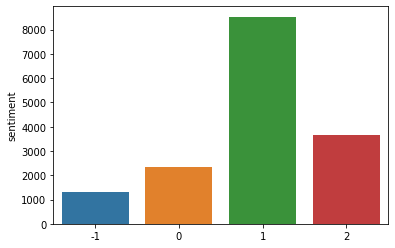

In [82]:
plot = df_train['sentiment'].value_counts()
sns.barplot(plot.index,plot)

In [83]:
df_train['num_words']=df_train['message'].apply(lambda x: len(str(x).split()))
df_test['num_words']=df_test['message'].apply(lambda x: len(str(x).split()))

df_train['num_unique_words']=df_train['message'].apply(lambda x: len(set(str(x).split())))
df_test['num_unique_words']=df_test['message'].apply(lambda x: len(set(str(x).split())))

df_train['num_chars']=df_train['message'].apply(lambda x: len(str(x)))
df_test['num_char']=df_test['message'].apply(lambda x: len(str(x)))

In [84]:
df_train['message_lower']=df_train['message'].str.lower()
df_test['message_lower']=df_test['message'].str.lower()

In [85]:
def sent_to_words(sent):
    sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
    sent = re.sub('\s+', ' ', sent)  # remove newline chars
    sent = re.sub("\'", "", sent)  # remove single quotes
    sent = re.sub('[^a-zA-z0-9\s]', '', sent) # remove
    sent=  re.sub('\d+', '',sent)
    # sent  = gensim.utils.simple_preprocess(str(sent), deacc=True)
    return sent


In [86]:
df_test.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_train.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))



,sentiment,message,tweetid,num_words,num_unique_words,num_chars,message_lower
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,polyscimajor epa chief doesn't think carbon di...
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,it's not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,rt @rawstory: researchers say we have three ye...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,#todayinmaker# wired : 2016 was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122,"rt @soynoviodetodas: it's 2016, and a racist, ..."
...,...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,22,22,140,rt @ezlusztig: they took down the material on ...
15815,2,RT @washingtonpost: How climate change could b...,17856,13,13,119,rt @washingtonpost: how climate change could b...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,19,19,133,notiven: rt: nytimesworld :what does trump act...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,21,20,129,rt @sara8smiles: hey liberals the climate chan...


In [87]:
df_train['text_wo_panct']= df_train['message_lower'].apply(lambda text:sent_to_words(text))
df_test['text_wo_panct']= df_test['message_lower'].apply(lambda text:sent_to_words(text))

In [88]:
df_train.head(4)

,sentiment,message,tweetid,num_words,num_unique_words,num_chars,message_lower,text_wo_panct
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,polyscimajor epa chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,it's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,rt @rawstory: researchers say we have three ye...,rt researchers say we have three years to act ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,#todayinmaker# wired : 2016 was a pivotal year...,todayinmaker wired was a pivotal year in the...


In [89]:
import nltk
from nltk.corpus import stopwords

stop=set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])



In [90]:
df_train['text_wo_stop']= df_train['text_wo_panct'].apply(lambda text:remove_stopwords(text))
df_test['text_wo_stop']= df_test['text_wo_panct'].apply(lambda text:remove_stopwords(text))

In [91]:
df_train.head()

,sentiment,message,tweetid,num_words,num_unique_words,num_chars,message_lower,text_wo_panct,text_wo_stop
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,polyscimajor epa chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,it's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,rt @rawstory: researchers say we have three ye...,rt researchers say we have three years to act ...,rt researchers say three years act climate cha...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,#todayinmaker# wired : 2016 was a pivotal year...,todayinmaker wired was a pivotal year in the...,todayinmaker wired pivotal year war climate ch...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122,"rt @soynoviodetodas: it's 2016, and a racist, ...",rt its and a racist sexist climate change den...,rt racist sexist climate change denying bigot ...


In [92]:
# remove URL's

In [93]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
df_train['text_wo_stop'] = df_train.text_wo_stop.apply(lemmatize_text)
df_test['text_wo_stop'] = df_test.text_wo_stop.apply(lemmatize_text)

df_train.head()

,sentiment,message,tweetid,num_words,num_unique_words,num_chars,message_lower,text_wo_panct,text_wo_stop
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,19,140,polyscimajor epa chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,126103,10,10,62,it's not like we lack evidence of anthropogeni...,its not like we lack evidence of anthropogenic...,"[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,19,19,140,rt @rawstory: researchers say we have three ye...,rt researchers say we have three years to act ...,"[rt, researcher, say, three, year, act, climat..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,15,99,#todayinmaker# wired : 2016 was a pivotal year...,todayinmaker wired was a pivotal year in the...,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,18,122,"rt @soynoviodetodas: it's 2016, and a racist, ...",rt its and a racist sexist climate change den...,"[rt, racist, sexist, climate, change, denying,..."


In [94]:
TFIDF= TfidfVectorizer(preprocessor=list,tokenizer=list,ngram_range=(1,2),min_df=2,strip_accents='ascii',smooth_idf=False)

In [95]:
x=df_train['text_wo_stop']
vec=TFIDF.fit(x)

c:\Users\ab012un\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [96]:
X_train=df_train['text_wo_stop']
X_test=df_test['text_wo_stop']

In [97]:
y_train=df_train.sentiment

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.2,shuffle=True,stratify=y_train,random_state=11)

In [99]:
X_train

1326     [rt, democrat, like, america, trump, ur, great...
1772     [rt, south, florida, dont, luxury, denying, cl...
7827     [novice, g, fails, agree, free, trade, protect...
420      [featuremexicos, maya, point, way, slow, speci...
10140    [yet, chinese, came, global, warming, httpstco...
                               ...                        
5935     [riding, horse, job, instead, driving, global,...
5317     [leonardo, dicaprio, guy, un, chose, global, w...
4809     [rt, message, climate, change, spending, money...
1568     [rt, global, warming, melt, arctic, sea, ice, ...
262      [rt, todd, starnes, hey, npr, take, global, wa...
Name: text_wo_stop, Length: 12655, dtype: object

In [100]:
train_vect=vec.transform(X_train)
test_vect=vec.transform(X_test)

In [101]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC #1
from sklearn.ensemble import RandomForestClassifier #low
from sklearn.linear_model import RidgeClassifier #low
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #error
from sklearn.ensemble import GradientBoostingClassifier #low
from sklearn.ensemble import AdaBoostClassifier #low
# from sklearn.ensemble import ExtraTreesClassifierv #2
# from sklearn.ensemble import 
from sklearn.neighbors import KNeighborsClassifier #

model =LinearSVC()
model.fit(train_vect,y_train)
y_pred=model.predict(test_vect)
target_names =['-1','0','1','2']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

          -1       0.64      0.41      0.50       259
           0       0.56      0.41      0.47       471
           1       0.75      0.86      0.80      1706
           2       0.75      0.72      0.73       728

    accuracy                           0.72      3164
   macro avg       0.67      0.60      0.63      3164
weighted avg       0.71      0.72      0.71      3164



In [102]:
from sklearn.metrics import f1_score


f1_score(y_test,y_pred,average="macro")

0.6276135350186876

In [103]:
testx=df_test['text_wo_stop']
test_vect=vec.transform(testx)


In [104]:
y_pred=model.predict(test_vect)
len(y_pred)

10546

In [105]:
df_test['sentiment'] =y_pred

In [106]:
df_test.head()

,message,tweetid,num_words,num_unique_words,num_char,message_lower,text_wo_panct,text_wo_stop,sentiment
0,Europe will now be looking to China to make su...,169760,20,19,121,europe will now be looking to china to make su...,europe will now be looking to china to make su...,"[europe, looking, china, make, sure, alone, fi...",1
1,Combine this with the polling of staffers re c...,35326,20,19,132,combine this with the polling of staffers re c...,combine this with the polling of staffers re c...,"[combine, polling, staffer, climate, change, w...",1
2,"The scary, unimpeachable evidence that climate...",224985,14,14,139,"the scary, unimpeachable evidence that climate...",the scary unimpeachable evidence that climate ...,"[scary, unimpeachable, evidence, climate, chan...",1
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263,23,23,139,@karoli @morgfair @osborneink @dailykos \r\npu...,putin got to you too jill trump doesnt belie...,"[putin, got, jill, trump, doesnt, believe, cli...",1
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,9,9,80,rt @fakewillmoore: 'female orgasms cause globa...,rt female orgasms cause global warming sarcast...,"[rt, female, orgasm, cause, global, warming, s...",0


In [107]:
df_test[['tweetid','sentiment']].to_csv('sub.csv',index=False)